## MBA em Ciência de Dados
# Redes Neurais e Arquiteturas Profundas

### <span style="color:darkred">Módulo 7 - Auto-encoders e Redes geradoras</span>


### <span style="color:darkred">Avaliação (com soluções)</span>

Moacir Antonelli Ponti

CeMEAI - ICMC/USP São Carlos

---

As respostas devem ser dadas no Moodle, use esse notebook apenas para gerar o código necessário para obter as respostas

---

### Questão 1)

Qual é a principal utilidade do aprendizado de uma rede do tipo Denoising Autoencoder que recebe por entrada $x \in X$ e realiza as operações em sequência $z = f(x)$ e $\hat{x} = g(z)$, sendo $z \in Z$ um vetor num espaço latente $Z$?

(a) Aprender a tarefa de reconstrução adicionando ruído no espaço latente $Z$, assim aprendendo a remover o ruído e ao mesmo tempo aprender atributos relevantes de $X$<br>
<font color='red'>
(b) Aprender uma projeção dos dados de entrada $X$ adicionados de ruído, num espaço latente $Z$ a partir do qual se possa reconstruir a entrada não ruidosa<br>
</font>
(c) Aprender a modelar diretamente a probabilidade dos dados limpos $p(X)$ a partir de uma distribuição latente $Z$ que é pré-treinada.<br>
(d) Aprender a reconstruir uma representação ruidosa da entrada $x$ que contenha atributos relevantes do espaço $z$ <br>
(e) Aprender a gerar exemplos artificiais $\hat{x}$ sem ruído a partir de dados ruidosos na distribuição latente $Z$<br>

**Justificativa:** o denoising autoencoder aprende uma representação restrita $Z$ do espaço de entrada $X$ por meio da tarefa de reconstrução de dados ruidosos em dados sem ruído. As alternativas incorretas são: (a) o Denoising Autoencoder não injeta ruído no espaço latente, (c) o Autoencoder não aprende $p(X)$ mas uma relação entre o espaço X e o espaço latente Z e sua reconstrução de volta em $X$, (d) o Denoising Autoencoder não reconstrói dados ruidosos e sim dados sem ruído a partir da entrada ruidosa, (e) o autoencoder não é um bom modelo para geração de dados, e em particular não lida com uma distribuiçã latente ruidosa e sim uma entrada ruidosa.

---
### Questão 2)


Qual das alternativas a seguir descreve corretamente uma diferença fundamental entre modelos GANs (Generative Adversarial Networks) e modelos de Difusão, ambos em sua formulação original, para geração de dados?

(a) GANs dependem exclusivamente de aprendizado supervisionado para aprender uma função de mapeamento entre vetores latentes e dados reais, enquanto modelos de Difusão utilizam aprendizado não supervisionado para modelar uma distribuição probabilística dos dados.</br>
(b) Os modelos de Difusão aprendem uma função determinística para mapear vetores latentes diretamente para dados reais, enquanto GANs utilizam uma função probabilística para realizar essa conversão.</br>
(c) Em modelos de Difusão, o discriminador é substituído por uma função de verificação de ruído a qual influencia no treinamento do componente gerador, enquanto em GANs o gerador não utiliza o discriminador para aprendizado do gerador.</br>
<font color="red">(d) GANs geram dados diretamente a partir de um vetor latente, enquanto modelos de Difusão geram dados por meio de uma sequência de passos incrementais, removendo gradualmente o ruído de uma distribuição inicial ruidosa.</br></font>
(e) GANs e modelos de Difusão operam com objetivos idênticos, mas os modelos de Difusão diferem pois utilizam operadores convolucionais para aprendizado da função de geração de imagens.


**Justificativa:** entre as alternativas incorretas **(a)** Ambos os modelos aplicam aprendizado não supervisionado para gerar dados, mas a estrutura de aprendizado é diferente: GANs usam discriminação adversarial, enquanto modelos de Difusão usam uma sequência de passos ruidosos; **(b)** GANs aprendem uma função de mapeamento entre o vetor latente e o espaço de dados, mas ela não é probabilística; o mapeamento é direto e único por amostra;  **(c)** Modelos de Difusão não utilizam um discriminador, seu processo de aprendizado é baseado na redução de ruído progressiva, enquanto o gerador das GANs utilizam diretamente o discriminador para aprender; **(e)** Embora ambos os modelos possam utilizar convoluções, a diferença principal reside no processo de geração, não no tipo de arquitetura convolucional.

---

### Questão 3)

A diferença entre o espaço latente ($Z$) aprendido por um Autoencoder convencional (AE) e um Variational Autoencoder (VAE) é:

(a) O AE aprende um espaço a partir de combinações fixas de pesos, enquanto o VAE cria projeções no espaço latente diretamente a partir das saídas da camada de entrada<br>
(b) O espaço do AE pode ser overcomplete ou undercomplete, enquanto o do VAE é apenas overcomplete data a natureza aproximadamente contínua das distribuições de probabilidade aprendidas<br>
(c) O espaço do VAE é não interpretável já que aprende distribuições de probabilidade, já o espaço aprendido pelo AE se pode interpretar a partir de cada projeção no espaço latente $Z$<br>
<font color="red">(d) O AE aprende um espaço a partir de projeções discretas de cada instância de treinamento, enquanto o VAE aproxima um espaço contínuo por meio do aprendizado de parâmetros de distribuições<br></font>
(e) O AE aprende um espaço contínuo a partir de projeções discretas de cada instância de treinamento, enquanto o VAE aproxima um espaço discreto por meio do aprendizado de parâmetros de distribuições<br>

**Justificativa**: O encoder do AE convencional realiza uma operação determinística para cada entrada, enquanto o VAE amostra do espaço latente com base em distribuições probabilísticas, facilitando a interpolação contínua entre representações. Alternativas incorretas: (a) o AE não cria um espaço latente por combinações fixas de pesos ou realiza projeções no espaço latente a partir das saídas da camada de entrada, (b) ambos os modelos podem ser overcomplete ou undercomplete, (c) a interpretabilidade não distingue os espaços aprendidos, e (e) o AE não aprende um espaço contínuo, enquanto o VAE não aproxima um espaço discreto.

---

### Questão 4)

Nessa questão você deverá projetar e treinar um Autoencoder a partir do qual utilizaremos seu componente Decoder. Siga como base o código disponível no notebook, e preencha com seu código conforme necessário para cumprir as tarefas a seguir.

Carregue a base de dados `wine.csv`, com uma divisão hold-out utilizando os 80% exemplos iniciais para treinamento e os restantes para teste. Utilizaremos o StandardScaler para normalizar os dados.

Projete um Denoising Autoencoder (usaremos uma camada de dropout na entrada como "ruído" impulsivo) para produzir um espaço latente com a seguinte arquitetura:

*Encoder*:
* Entrada (com as dimensões da base de dados)
* Dropout de 0.3
* Camada densa de 7 neurônios e ativação tangente hiperbólica
* Camada densa de 2 neurônios (camada de código) e ativação tangente hiperbólica

*Decoder*:
* Camada densa de 9 neurônios e ativação tangente hiperbólica (recebe como entrada o código do encoder)
* Camada densa de saída (com as dimensões da base de dados) e ativação tangente hiperbólica


OBS: código é o nome que se dá à camada latente do Autoencoder, geralmente aquela contendo a maior restrição de dimensionalidade, que fornece um espaço de características compacto para os dados de entrada. Também chamamos de código as características obtidas a partir dessa camada.

Inicialize as sementes `seed(1)` e `set_seed(2)` antes de instanciar o modelo, compilar e treinar.

Utilize a função de custo mean squared error (mse), otimizador Adam com taxa 0.0001, batchsize 10 e treine por 250 épocas.

Após o treinamento, iremos utilizar o decoder para gerar um dataset artificial. Para isso:
1. Crie um array de tamanho 2000 x 2 com valores obtidos pela distribuição uniforme (`np.random.rand()`), e depois normalize os valores para o intervalo entre -1 e 1 usando o MinMaxScaler. Esses valores serão utilizados como amostras aleatórias do código.
2. Passe esse array pelo decoder e obtenha como saída um dataset artificial com 2000 instancias na dimensionalidade original dos dados da base wine.
3. Para rotular essas instâncias, iremos utilizar um classificador KNN treinado no conjunto de treinamento da base original wine, com K=7. Após treinar o classificador, aplicá-lo no dataset artificial, obtendo seus rótulos, ou seja consideraremos como rótulo o que o KNN classificar. A seguir selecionaremos apenas as instâncias e seus respectivos rótulos que receberam probabilidade igual ou superior a 0.99 pelo classificador, gerando um dataset mais reduzido. Esse será nosso dataset artificial final.
4. Treine dois classificadores SVM com C=1, random_state=1, e kernel="linear"
  - o primeiro usando os dados de treinamento originais
  - o segundo usando como treinamento os dados artificiais/sintéticos
5. Avalie ambos no conjunto de testes original usando a acurácia.

Em qual intervalo estão as acurácias dos classificadores considerando o uso de dados originais e artificiais?

(a) dados originais=[55,70], dados artificiais=[25,40]<br>
(b) dados originais=[55,70], dados artificiais=[55,70]<br>
(c) dados originais=[85,100], dados artificiais=[25,40]<br>
(d) dados originais=[85,100], dados artificiais=[55,70]<br>
<font color='red'>(e) dados originais=[85,100], dados artificiais=[85,100]<br></font>

 **Justificativa**: Ver código abaixo.

In [1]:
%%capture
!pip install tensorflow tensorflow-datasets

In [2]:

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Carregar os dados do conjunto de dados Wine da UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    'Class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'
]
data = pd.read_csv(url, names=column_names)

# extrair features e labels
features = data.drop('Class', axis=1)
labels = data['Class']

# divisao treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [3]:
X_train

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515
98,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
38,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
106,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
92,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495


In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from numpy.random import seed
from tensorflow.random import set_seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

In [6]:
### Projetar modelo de autoencoder

In [7]:
def autoencoder(input_dim, neurons=(7,2,9), dropout_rate=0.0):
    input_x = keras.layers.Input(shape=(input_dim,))
    xe = keras.layers.Dropout(dropout_rate, name='dropout')(input_x)
    xe = keras.layers.Dense(neurons[0], activation='tanh', name='encoder')(xe)
    z = keras.layers.Dense(neurons[1], activation='tanh', name='code')(xe)
    xd = keras.layers.Dense(neurons[2], activation='tanh', name='decoder')(z)
    output_xd = keras.layers.Dense(input_dim, activation='tanh')(xd)
    autoencoder = keras.models.Model(input_x, output_xd)
    return autoencoder

In [8]:
### definir sementes, instanciar AE, compilar e treinar

In [9]:
X_train_n.shape

(142, 13)

In [10]:
epochs = 250
batch_size = 10

seed(1)
set_seed(2)

neurons = (7,2,9)

# instanciar AE
# compilar AE
# treinar AE
autoencoder1 = autoencoder(X_train_n.shape[1], neurons=neurons, dropout_rate=0.3)
autoencoder1.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.0001))
hist1 = autoencoder1.fit(X_train_n, X_train_n, batch_size=batch_size, epochs=epochs, verbose=0)

In [11]:
autoencoder1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder (Dense)                      │ (None, 7)                   │              98 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ code (Dense)                         │ (None, 2)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Dense)                      │ (None, 9)                   │              27 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 13)                  │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 815 (3.19 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 544 (2.13 KB)

In [12]:
# computa erro de treinamento
scores1 = autoencoder1.evaluate(X_train_n, X_train_n)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.5850


In [13]:
# montar decoder, gerar array com 2000 x 3 numeros aleatorios, e escalar para -1,1
# passar array pelo decoder, obtendo um dataset artificial

In [14]:
seed(1)
decoder_ae = keras.models.Model(inputs=autoencoder1.get_layer('decoder').input, outputs=autoencoder1.output)
z_sample = np.random.rand(2000,2)
scaler = MinMaxScaler(feature_range=(-1, 1))
z_sample = scaler.fit_transform(z_sample)

train_synt = np.asarray(decoder_ae.predict(z_sample))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [30]:
# treinar KNN (K=7) com base de dados original
# usá-lo para rotular o dataset artificial
# selecionar apenas as instancias artificiais que receberam probabilidade maxima >= 0.99

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_n, y_train)

# Predicting labels for the unlabeled data
y_synt = knn.predict(train_synt)
prob_synt = knn.predict_proba(train_synt)

In [32]:
threshold = 0.99
max_probs = np.max(prob_synt, axis=1)

selected_indices = np.where(max_probs >= threshold)[0]
train_synt_selected = train_synt[selected_indices]
y_synt = y_synt[selected_indices]
print(f'Total selected: {train_synt_selected.shape[0]}')

Total selected: 823


In [33]:
# treinar classificadores SVM com a base original e artificial
# avaliar ambos no teste original, usando acuracia

In [34]:
from sklearn import svm

In [35]:
clf1 = svm.SVC(C=1, random_state=1, kernel="linear")
clf1.fit(X_train_n, y_train)
score1 = clf1.score(X_test_n, y_test)

In [36]:
clf2 = svm.SVC(C=1, random_state=1, kernel="linear")
clf2.fit(train_synt_selected, y_synt)
score2 = clf2.score(X_test_n, y_test)

print(f'Acc Original = {score1*100:.1f}%')
print(f'Acc Synthetic = {score2*100:.1f}%')

Acc Original = 97.2%
Acc Synthetic = 100.0%


In [21]:
### Código complementar - para entendimento da base artificial

### Obter características a partir da camada de código do autoencoder
### - para a base original
### - para a base artificial selecionada

In [22]:
code_model1 = keras.models.Model(inputs=autoencoder1.input, outputs=autoencoder1.get_layer('code').output)

In [25]:
code_test = np.asarray(code_model1.predict(X_test_n))
code_augmented = np.asarray(code_model1.predict(train_synt_selected))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Text(0.5, 1.0, 'Espaço latente Teste')

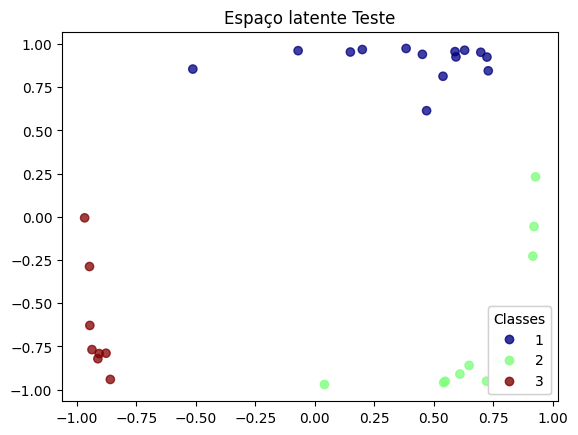

In [26]:
### Exibir as duas primeiras caracerísticas para análise visual
size_sample = len(X_test)
fig, ax = plt.subplots()
scatter = ax.scatter(code_test[:size_sample,0], code_test[:size_sample,1], c=y_test[:size_sample], alpha=0.75, cmap="jet")
legend1 = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
ax.add_artist(legend1)
plt.title('Espaço latente Teste')

Text(0.5, 1.0, 'Espaço latente Dados Gerados')

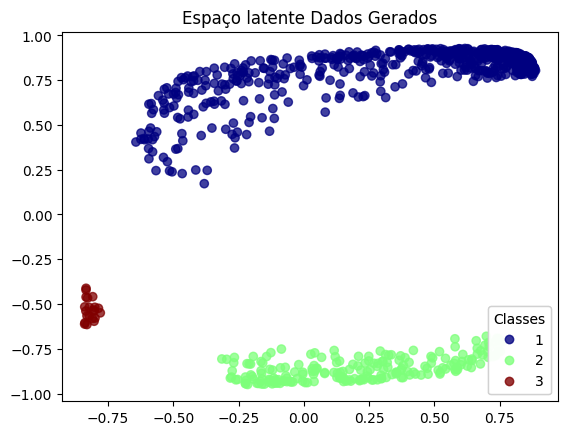

In [28]:
### Exibir as duas primeiras caracerísticas para análise visual
size_sample = len(train_synt_selected)
fig, ax = plt.subplots()
scatter = ax.scatter(code_augmented[:size_sample,0], code_augmented[:size_sample,1], c=y_synt[:size_sample], alpha=0.75, cmap="jet")
legend1 = ax.legend(*scatter.legend_elements(), loc="lower right", title="Classes")
ax.add_artist(legend1)
plt.title('Espaço latente Dados Gerados')

---

### Questão 5)

Nessa questão você deverá projetar e treinar um Autoencoder para posteriormente utilizar o seu Encoder como forma de reduzir dimensionalidade. Siga como base o código disponível no notebook, e preencha com seu código conforme necessário para cumprir as tarefas a seguir.

Carregue a base de dados `wine.csv`, com uma divisão hold-out utilizando os 80% exemplos iniciais para treinamento e os restantes para teste. Utilizaremos um StandardScaler para pré-processar os dados antes de utilizá-los no experimento.

Projete um Denoising Autoencoder (o dropout na camada de entrada irá gerar o ruído) para produzir uma projeção no espaço latente, com as seguintes camadas:
* Entrada (com as dimensões originais da base de dados)
* Dropout de 0.2
* Camada densas com 4 neurônios, ativação tangente hiperbólica
* Camada densa com 1 neurônio (camada de código), ativação tangente hiperbólica
* Camada densas com 4 neurônios, ativação tangente hiperbólica
* Camada densa de saída (com as dimensões originais da base de dados), ativação tangente hiperbólica

Realize 5 experimentos (treinamentos) com as sementes 1, 3, 5, 7 e 13. Inicialize as sementes `seed()` e `set_seed()` antes de instanciar o modelo, compilar e treinar (com o conjunto de treinamento).

Em todas as rodadas, utilize a função de custo mean squared error (MSE), otimizador Adam com taxa inicial 0.001, decaimento conforme função fornecida, batchsize 4 e treine por 150 épocas.

Após cada treinamento:
1. Calcule o MSE (do autoencoder) no conjunto de teste (use o método `evaluate`)
2. Obtenha as características a partir do código de 1 dimensão para o conjunto de treinamento e de teste. Treine um classificador Regressão Logística (utilizando `LogisticRegression(max_iter=200, solver='sag', random_state=sd)`, sendo `seed` a mesma do treinamento da rede neural, com o código de treinamento. Calcule a acurácia obtida pelo classificador no conjunto de teste (utilizando como entrada também as características para os dados de teste obtidas a partir do autoencoder).

Os valores observados da média do MSE no teste do autoencoder, e média da acurácia de classificação no teste estão em qual intervalo?

(a) MSE =[0.64, 0.69]; Acurácia = [0.64, 0.69] <br>
<font color='red'>(b) MSE =[0.64, 0.69]; Acurácia = [0.80, 0.85] <br></font>
(c) MSE =[0.64, 0.69]; Acurácia = [0.95, 0.99] <br>
(d) MSE =[0.48, 0.52]; Acurácia = [0.80, 0.85] <br>
(e) MSE =[0.48, 0.52]; Acurácia = [0.95, 0.99] <br>

 **Justificativa**: Ver código abaixo.

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from numpy.random import seed
from tensorflow.random import set_seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression

# Carregar os dados do conjunto de dados Wine da UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = [
    'Class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'
]
df = pd.read_csv(url, names=column_names)

df.dropna(inplace=True)
print(df.head())
classif = np.array(df['Class'].astype("category").cat.codes)
df_features = df.drop('Class', axis=1)
print(f'Features: {list(df_features.columns)}')
features = df_features.values
print(features.shape)

X_train, X_test, y_train, y_test = train_test_split(features, classif, test_size=0.20, random_state=0)
print("Exemplos de treinamento:", len(X_train))
print("Exemplos de teste:", len(X_test))

scaler = StandardScaler()
X_train_n = scaler.fit_transform(X_train)
X_test_n = scaler.transform(X_test)

   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

In [ ]:
def autoencoder(input_dim, neurons=(5,2,5), dropout_rate=0.0):
    input_x = keras.layers.Input(shape=(input_dim,))
    xed = keras.layers.Dropout(dropout_rate, name='dropout')(input_x)
    xe = keras.layers.Dense(neurons[0], activation='tanh', name='encoder')(xed)
    z = keras.layers.Dense(neurons[1], activation='tanh', name='code')(xe)
    xd = keras.layers.Dense(neurons[2], activation='tanh', name='decoder')(z)
    output_xd = keras.layers.Dense(input_dim, activation='tanh')(xd)
    autoencoder = keras.models.Model(input_x, output_xd)
    return autoencoder

In [ ]:
epochs = 150
batch_size = 4

def scheduler(epoch, lr):
    lr = float(lr * tf.math.exp(-0.01))
    return lr

callbacklr = keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
seeds_list = [1, 3, 5, 7, 13]

neurons_layers = (4,1,4)

mse_list = []
acc_list = []

for sd in seeds_list:
    seed(sd)
    set_seed(sd)

    print(f'Seed: {sd}')

    autoencoder2 = autoencoder(X_train_n.shape[1], neurons_layers, dropout_rate=0.2)
    autoencoder2.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.001))
    hist2 = autoencoder2.fit(X_train_n, X_train_n, batch_size=batch_size, callbacks=[callbacklr],
                        epochs=epochs, verbose=0)

    scores2 = autoencoder2.evaluate(X_train_n, X_train_n, verbose=0)
    print(f'MSE treinamento: {scores2:.4f}')
    scores3 = autoencoder2.evaluate(X_test_n, X_test_n, verbose=0)
    print(f'MSE teste: {scores3:.4f}')

    mse_list.append(scores3)

    code_modelae = keras.models.Model(inputs=autoencoder2.input, outputs=autoencoder2.get_layer('code').output)
    code_train = np.asarray(code_modelae.predict(X_train_n, verbose=0))

    clf2 = LogisticRegression(max_iter=200, solver='sag', random_state=sd)
    #clf2 = svm.SVC(C=1, random_state=sd, kernel="linear")
    clf2.fit(code_train, y_train)

    code_test = np.asarray(code_modelae.predict(X_test_n, verbose=0))

    score = clf2.score(code_test, y_test)

    print(f'Classifier accuracy: {score*100:.1f}\n')
    acc_list.append(score)

Seed: 1
MSE treinamento: 0.6377
MSE teste: 0.6604
Classifier accuracy: 83.3

Seed: 3
MSE treinamento: 0.6371
MSE teste: 0.6699
Classifier accuracy: 83.3

Seed: 5
MSE treinamento: 0.6311
MSE teste: 0.6576
Classifier accuracy: 88.9

Seed: 7
MSE treinamento: 0.6419
MSE teste: 0.6634
Classifier accuracy: 80.6

Seed: 13
MSE treinamento: 0.6513
MSE teste: 0.6736
Classifier accuracy: 77.8



In [ ]:
print(f'MSE médio: {np.mean(mse_list):.2f}')
print(f'Acurácia média: {np.mean(acc_list):.2f}')

MSE médio: 0.66
Acurácia média: 0.83


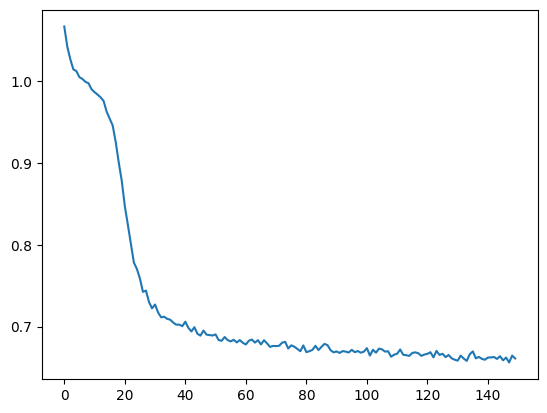

In [ ]:
plt.plot(hist2.history['loss'])

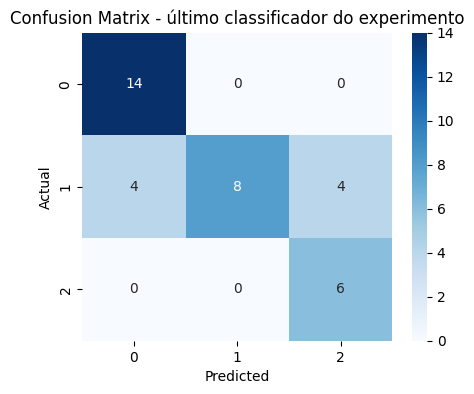

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predicoes do último classificador
y_pred = clf2.predict(code_test)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - último classificador do experimento')
plt.show()